In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import warnings
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv('titanic.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
tab_info=pd.DataFrame(df.dtypes).T.rename(index={0:'column type'})
tab_info = tab_info.append(pd.DataFrame(df.isnull().sum()).T.rename(index={0:'null values (nb)'}))
tab_info = tab_info.append(pd.DataFrame(df.isnull().sum()/df.isnull().shape[0]*100).T.rename(index={0:'null values %'}))


In [5]:
tab_info

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
column type,int64,int64,int64,object,object,float64,int64,int64,object,float64,object,object
null values (nb),0,0,0,0,0,177,0,0,0,0,687,2
null values %,0.0,0.0,0.0,0.0,0.0,19.86532,0.0,0.0,0.0,0.0,77.104377,0.224467


In [6]:
df.shape

(891, 12)

####  missing values percentage in the cabin column is way above imputation acceptance limit, so let's drop the column entirely

In [7]:
df.drop('Cabin', axis=1, inplace=True)

#### Missing value imputation

In [8]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [9]:
df['Age'].fillna(df.Age.mean(), inplace=True)

In [10]:
df.dropna(subset=['Fare'], inplace=True)

In [11]:
df['Embarked'].fillna(method='bfill', inplace=True)

In [12]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [13]:
df.shape

(891, 11)

##### Visualize 

In [14]:
sns.set_theme(context='notebook',
              style='whitegrid',
              palette='rainbow',
              font='Lucida Calligraphy',
              font_scale=1.2,
              rc=None)

<AxesSubplot:xlabel='Survived', ylabel='count'>

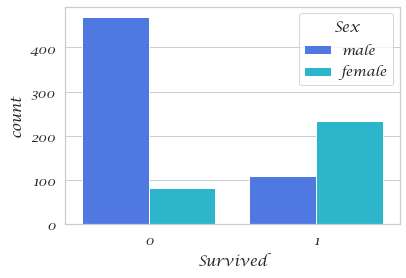

In [15]:
sns.countplot(data=df, hue='Sex', x='Survived' )

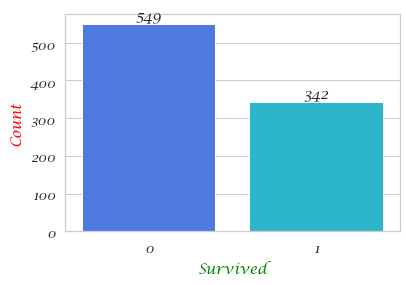

In [16]:
ax = sns.countplot(x='Survived', data=df)
ax.bar_label(ax.containers[0])
plt.xlabel('Survived',color='Green',loc='center',font='Lucida Calligraphy')
plt.ylabel('Count',color='Red',loc='center',font='Lucida Calligraphy');

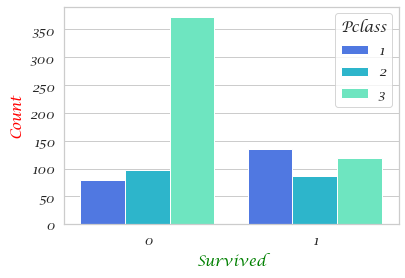

In [17]:
ax = sns.countplot(x='Survived',hue='Pclass', data=df)
plt.xlabel('Survived',color='Green',loc='center',font='Lucida Calligraphy')
plt.ylabel('Count',color='Red',loc='center',font='Lucida Calligraphy');

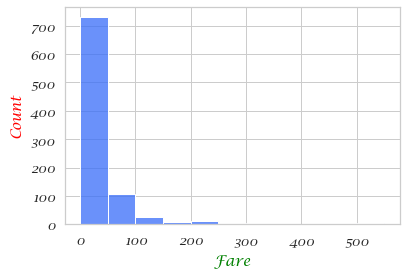

In [18]:
sns.histplot(data=df, x='Fare', bins=20, binwidth=50)
plt.xlabel('Fare',color='Green',loc='center',font='Lucida Calligraphy')
plt.ylabel('Count',color='Red',loc='center',font='Lucida Calligraphy');

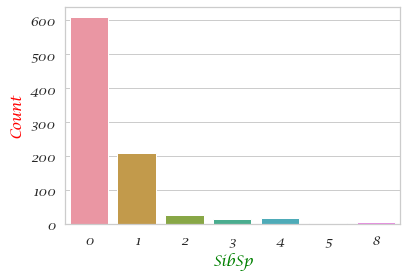

In [19]:
sns.countplot(x='SibSp', data=df)
plt.xlabel('SibSp',color='Green',loc='center',font='Lucida Calligraphy')
plt.ylabel('Count',color='Red',loc='center',font='Lucida Calligraphy');

<AxesSubplot:xlabel='Survived', ylabel='count'>

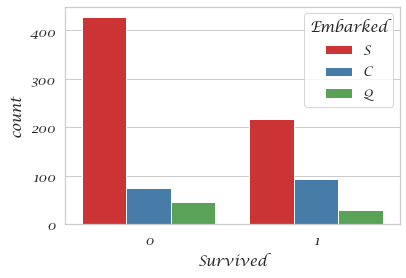

In [20]:
sns.countplot( x='Survived', data=df, hue="Embarked", palette="Set1")

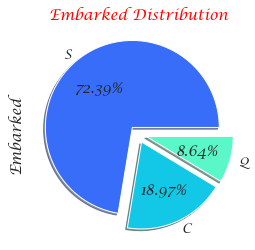

In [21]:
df['Embarked'].value_counts().plot.pie(explode=[0.1, 0.1, 0.1],
                                     autopct='%1.2f%%',
                                     shadow=True)
plt.title('Embarked Distribution',color='Red',loc='center');

In [22]:
df.corr().style.background_gradient(cmap='coolwarm').set_precision(3)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000,-0.005,-0.035,0.033,-0.058,-0.002,0.013
Survived,-0.005,1.000,-0.338,-0.070,-0.035,0.082,0.257
Pclass,-0.035,-0.338,1.000,-0.331,0.083,0.018,-0.549
Age,0.033,-0.070,-0.331,1.000,-0.233,-0.179,0.092
SibSp,-0.058,-0.035,0.083,-0.233,1.000,0.415,0.160
Parch,-0.002,0.082,0.018,-0.179,0.415,1.000,0.216
Fare,0.013,0.257,-0.549,0.092,0.160,0.216,1.000


<AxesSubplot:xlabel='Age', ylabel='Count'>

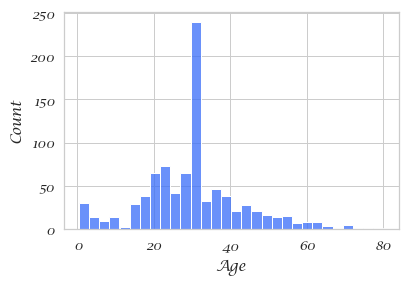

In [23]:
sns.histplot(data=df, x='Age')

In [24]:
hig_corr = df.corr()
hig_corr_features = hig_corr.index[abs(hig_corr["Fare"]) >= 0.25]
hig_corr_features

Index(['Survived', 'Pclass', 'Fare'], dtype='object')

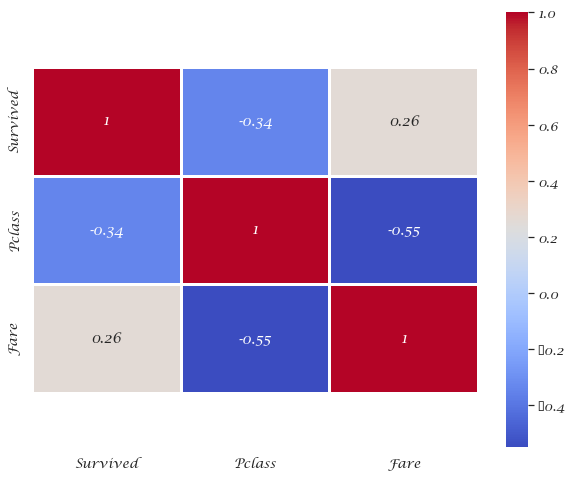

In [25]:
plt.figure(figsize=(10,8))
ax = sns.heatmap(df[hig_corr_features].corr(), cmap = "coolwarm", annot=True, linewidth=3)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

#### Feature Engineering

In [26]:
df = pd.get_dummies(df,columns=['Sex','Embarked'],drop_first=True)
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,0,1


In [27]:
df.drop(columns=['Name', 'Ticket','PassengerId'], inplace=True)

In [28]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


### Train Test Split

In [29]:
X = df.drop(['Survived'],axis=1) 
Y = df['Survived']

In [31]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=21)

### Standardizing the data

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [33]:
display(X_train.head())
display(X_test.head())

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,-1.584396,0.010681,-0.479698,-0.460682,-0.018600,0.728823,-0.311564,-1.611198
1,-1.584396,-0.119643,-0.479698,-0.460682,0.079245,0.728823,-0.311564,0.620656
2,-1.584396,-0.503148,-0.479698,0.810657,0.646624,0.728823,-0.311564,-1.611198
3,-0.381742,-1.193456,0.493365,-0.460682,-0.031329,-1.372075,-0.311564,-1.611198
4,0.820913,0.033758,-0.479698,-0.460682,-0.479818,0.728823,-0.311564,0.620656


,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0.820913,-0.273045,0.493365,-0.460682,-0.315867,-1.372075,-0.311564,0.620656
1,0.820913,-0.809952,-0.479698,-0.460682,-0.485419,0.728823,-0.311564,0.620656
2,0.820913,-0.733251,-0.479698,-0.460682,-0.467343,0.728823,-0.311564,0.620656
3,0.820913,0.010681,-0.479698,-0.460682,0.506858,0.728823,-0.311564,0.620656
4,-0.381742,0.493964,0.493365,2.081997,-0.078596,0.728823,-0.311564,0.620656


#### Model Implementation

#### LogisticRegression

In [34]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)

Y_pred = log_reg.predict(X_test)

log_train = round(log_reg.score(X_train, Y_train) * 100, 2)
log_accuracy = round(accuracy_score(Y_pred, Y_test) * 100, 2)

print("Training Accuracy    :",log_train)
print("Model Accuracy Score :",log_accuracy)

Training Accuracy    : 80.48
Model Accuracy Score : 80.45


#### Support Vector Machines

In [35]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)

svc_train = svc.score(X_train, Y_train) * 100
svc_accuracy = round(accuracy_score(Y_pred, Y_test) * 100, 2)

print("Training Accuracy     :",svc_train)
print("Model Accuracy Score  :",svc_accuracy)

Training Accuracy     : 84.8314606741573
Model Accuracy Score  : 82.12


#### KNeighborsClassifier

In [36]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)

knn_train = round(knn.score(X_train, Y_train) * 100, 2)
knn_accuracy = round(accuracy_score(Y_pred, Y_test) * 100, 2)

print("Training Accuracy     :",knn_train)
print("Model Accuracy Score  :",knn_accuracy)

Training Accuracy     : 86.52
Model Accuracy Score  : 81.01


#### GaussianNB

In [37]:
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)

gaussian_train = round(gaussian.score(X_train, Y_train) * 100, 2)
gaussian_accuracy = round(accuracy_score(Y_pred, Y_test) * 100, 2)

print("Training Accuracy     :",gaussian_train)
print("Model Accuracy Score  :",gaussian_accuracy)

Training Accuracy     : 79.07
Model Accuracy Score  : 81.56


#### Perceptron

In [38]:
from sklearn.linear_model import Perceptron
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)


perceptron_train = round(perceptron.score(X_train, Y_train) * 100, 2)
perceptron_accuracy = round(accuracy_score(Y_pred, Y_test) * 100, 2)

print("Training Accuracy    :",perceptron_train)
print("Model Accuracy Score :",perceptron_accuracy)

Training Accuracy    : 71.63
Model Accuracy Score : 70.95


#### LinearSVC

In [39]:
from sklearn.svm import LinearSVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)

linear_svc_train = round(linear_svc.score(X_train, Y_train) * 100, 2)
linear_svc_accuracy = round(accuracy_score(Y_pred, Y_test) * 100, 2)

print("Training Accuracy    :",linear_svc_train)
print("Model Accuracy Score :",linear_svc_accuracy)

Training Accuracy    : 80.34
Model Accuracy Score : 80.45


#### SGDClassifier

In [40]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)

sgd_train = round(sgd.score(X_train, Y_train) * 100, 2)
sgd_accuracy = round(accuracy_score(Y_pred, Y_test) * 100, 2)

print("Training Accuracy     :",sgd_train)
print("Model Accuracy Score  :",sgd_accuracy)

Training Accuracy     : 80.06
Model Accuracy Score  : 79.89


#### DecisionTreeClassifier

In [41]:
from sklearn.tree import DecisionTreeClassifier
decision = DecisionTreeClassifier()
decision.fit(X_train, Y_train)
Y_pred = decision.predict(X_test)

decision_train = round(decision.score(X_train, Y_train) * 100, 2)
decision_accuracy = round(accuracy_score(Y_pred, Y_test) * 100, 2)

print("Training Accuracy     :",decision_train)
print("Model Accuracy Score  :",decision_accuracy)

Training Accuracy     : 98.6
Model Accuracy Score  : 77.65


#### RandomForestClassifier

In [42]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)

random_forest_train = round(random_forest.score(X_train, Y_train) * 100, 2)
random_forest_accuracy = round(accuracy_score(Y_pred, Y_test) * 100, 2)

print("Training Accuracy     :",random_forest_train)
print("Model Accuracy Score  :",random_forest_accuracy)

Training Accuracy     : 98.6
Model Accuracy Score  : 82.12


#### MLPClassifier

In [43]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
mlp.fit(X_train,Y_train)
Y_pred = mlp.predict(X_test)
mlp.score(X_train, Y_train)


mlp_train = round(mlp.score(X_train, Y_train) * 100, 2)
mlp_accuracy = round(accuracy_score(Y_pred, Y_test) * 100, 2)

print("Training Accuracy     :",mlp_train)
print("Model Accuracy Score  :",mlp_accuracy)

Training Accuracy     : 85.96
Model Accuracy Score  : 82.12


#### XGBClassifier

In [44]:
import xgboost as Xgb
xgb = Xgb.XGBClassifier()
xgb.fit(X_train,Y_train)
Y_pred = xgb.predict(X_test)
xgb.score(X_train, Y_train)

xgb_train = round(xgb.score(X_train, Y_train) * 100, 2)
xgb_accuracy = round(accuracy_score(Y_pred, Y_test) * 100, 2)

print("Training Accuracy     :",xgb_train)
print("Model Accuracy Score  :",xgb_accuracy)

Training Accuracy     : 97.33
Model Accuracy Score  : 83.8


In [45]:
models = pd.DataFrame({
    'Model': [
        'Support Vector Machines', 'KNN', 'Logistic Regression',
        'Random Forest',  'Perceptron',
        'Stochastic Gradient Decent', 'Linear SVC', 'Decision Tree',
        'GaussianNB', 'MLPClassifier', 'XGBClassifier'
    ],
    'Training Accuracy': [
        log_train, svc_train, knn_train, gaussian_train, perceptron_train,
        linear_svc_train, sgd_train, decision_train, random_forest_train,
        mlp_train, xgb_train
    ],
    'Model Accuracy Score': [
        log_accuracy, svc_accuracy, knn_accuracy, gaussian_accuracy, perceptron_accuracy,
        linear_svc_accuracy, sgd_accuracy, decision_accuracy, random_forest_accuracy,
        mlp_accuracy, xgb_accuracy
    ]
})

In [46]:
models.sort_values(by='Model Accuracy Score', ascending=False, ignore_index=True)

,Model,Training Accuracy,Model Accuracy Score
0,XGBClassifier,97.330000,83.80
1,KNN,84.831461,82.12
2,GaussianNB,98.600000,82.12
3,MLPClassifier,85.960000,82.12
4,Random Forest,79.070000,81.56
5,Logistic Regression,86.520000,81.01
6,Support Vector Machines,80.480000,80.45
7,Stochastic Gradient Decent,80.340000,80.45
8,Linear SVC,80.060000,79.89
9,Decision Tree,98.600000,77.65
